# **Importing Necassary Libraries**

In [2]:
! pip install tensorflow

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.14.1-cp311-cp311-win_amd64.whl.metadata (6.9 kB)
  Using cached tensorflow

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
! pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.3/38.6 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.4/38.6 MB 4.9 MB/s eta 0:00:08
    --------------------------------------- 0.8/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.6 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.8/38.6 MB 7.8 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.6 MB 8.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.6 MB 10.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.6 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.6 MB 11.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.6 MB 11.4 MB/s eta 0:00:03
   ------ --------------------------------- 6.6/38.6 MB 13.6 MB/s eta 0:00:03
 

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

# **Mapping Classes to Data**

In [4]:
import os
df = pd.read_csv(r"D:\Project\diabetic-retinopathy-224x224-gaussian-filtered\train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

# **Data Visualization**

In [5]:
df.head()

,id_code,diagnosis,binary,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

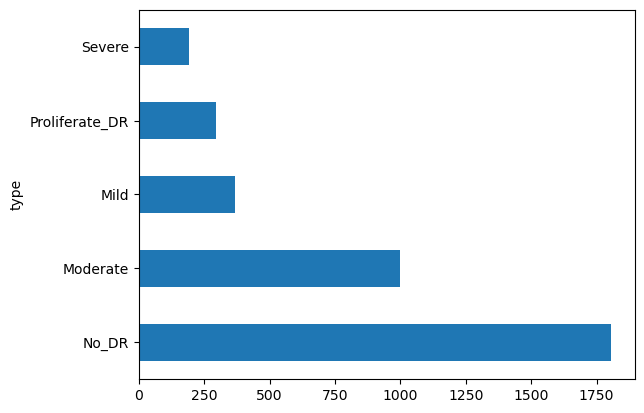

In [6]:
df['type'].value_counts().plot(kind='barh')

<Axes: ylabel='binary'>

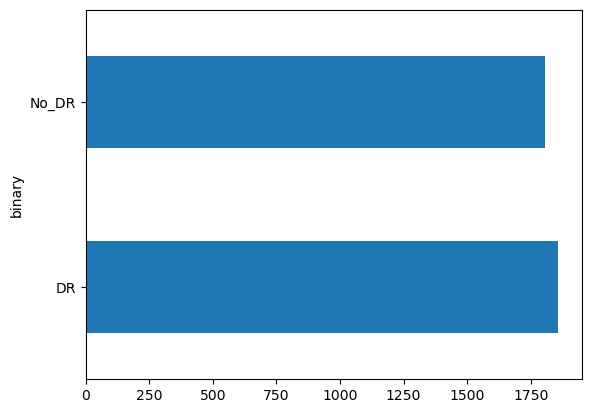

In [7]:
df['binary'].value_counts().plot(kind='barh')

# **Data Preprocessing**

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


>***Gathering Images and Lables***

In [9]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images(r"D:\Project\diabetic-retinopathy-224x224-gaussian-filtered\gaussian_filtered_images\gaussian_filtered_images"))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


>***Normalizing the Data***

In [11]:
data = data / 255.0

# **Splitting Data to Training , Validatoin and Testing Sets**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


# **Preparing VGG16 Pretrained Model**

In [14]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers

In [18]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 

Vgg16.trainable=False



58889256/58889256 [==============================] - 4s 0us/step


# **Fine-Tuning VGG16**

In [19]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics="binary_accuracy" )

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 1

In [21]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/50


37/37 [==============================] - 251s 7s/step - loss: 0.3799 - binary_accuracy: 0.8394 - val_loss: 0.2660 - val_binary_accuracy: 0.8846
Epoch 2/50
37/37 [==============================] - 247s 7s/step - loss: 0.2942 - binary_accuracy: 0.8788 - val_loss: 0.2493 - val_binary_accuracy: 0.9010
Epoch 3/50
37/37 [==============================] - 241s 7s/step - loss: 0.2777 - binary_accuracy: 0.8864 - val_loss: 0.2439 - val_binary_accuracy: 0.9024
Epoch 4/50
37/37 [==============================] - 5301s 147s/step - loss: 0.2695 - binary_accuracy: 0.8910 - val_loss: 0.2400 - val_binary_accuracy: 0.8962
Epoch 5/50
37/37 [==============================] - 202s 6s/step - loss: 0.2602 - binary_accuracy: 0.8937 - val_loss: 0.2342 - val_binary_accuracy: 0.9065
Epoch 6/50
37/37 [==============================] - 204s 6s/step - loss: 0.2575 - binary_accuracy: 0.8952 - val_loss: 0.2324 - val_binary_accuracy: 0.9065
Epoch 7/50
37/37 [==============================] - 200s 5s/step 

# **Evaluating the Model Performene**

In [15]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

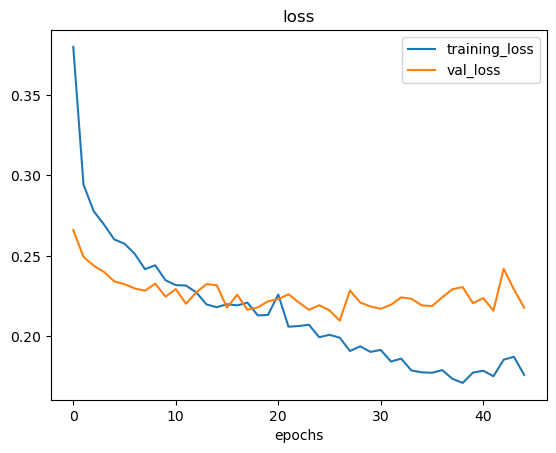

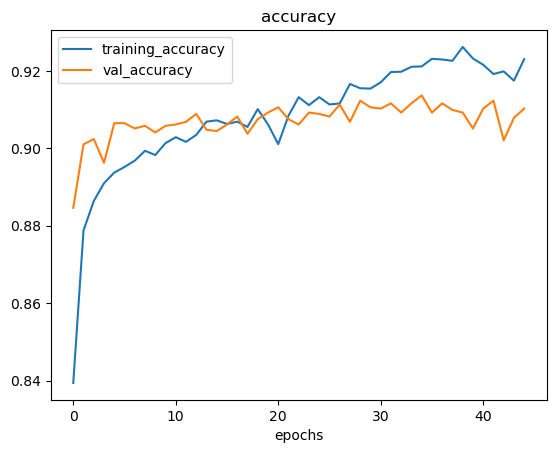

In [23]:
plot_curves(history)

In [ ]:
score = model.evaluate(x_test,y_test)

23/23 [==============================] - 7s 186ms/step - loss: 0.2226 - binary_accuracy: 0.9102


> **Predicting Test Set**

In [24]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

23/23 [==============================] - 51s 2s/step


# ***Visualizing a prediction***

[0 0 1 0 0]
Prediction: NO_DR


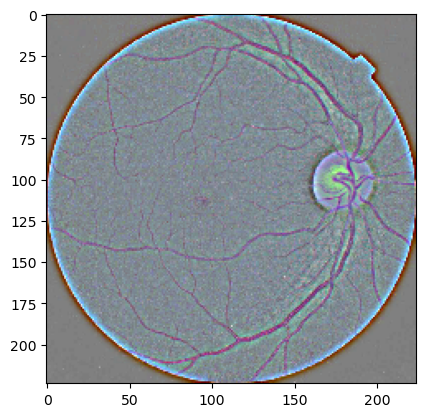

In [25]:
index =5
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}") # predicted  

In [39]:
model.save("DRD_model.keras")

In [40]:
tf.saved_model.save(model, 'DRD_model1')

INFO:tensorflow:Assets written to: DRD_model1\assets


INFO:tensorflow:Assets written to: DRD_model1\assets


# **Predicting a new Sample**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def predict_new(path):
    img = cv2.imread(path)
    level=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    print(predict)
    pr=list(predict[0])
    pred_level=level[pr.index(max(pr))]
    
    # print(f"Predicted: {predictions[pred[0]]}")
    print(f"Level: {pred_level}")

1/1 [==============================] - 0s 165ms/step
[[0.69002473 0.30504966 0.07469035 0.03135365 0.0038683 ]]
Level: Mild


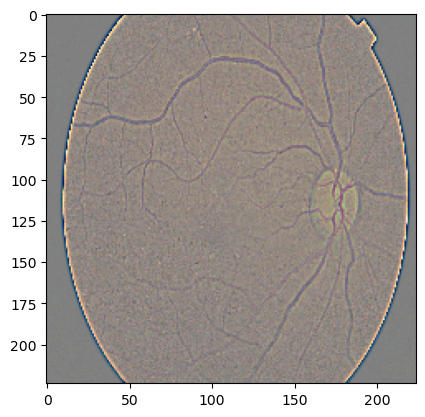

In [43]:
predict_new(r"D:\Project\diabetic-retinopathy-224x224-gaussian-filtered\gaussian_filtered_images\gaussian_filtered_images\Mild\2f2e1949ad56.png")


In [17]:
from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

from tensorflow.keras.models import Model


vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)



vgg.trainable = True

set_trainable = False

for layer in vgg.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg.layers[:]:
  if ('bn' in layer.name):
    trainable = False


x = Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)





In [18]:
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [29]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=10, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = 'DR-model.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [27]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [30]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_val,y_val),
          epochs=40,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/40
74/74 [==============================] - ETA: 0s - loss: 1.0002 - accuracy: 0.6347
Epoch 1: val_accuracy improved from -inf to 0.67065, saving model to DR-model.h5
74/74 [==============================] - 85s 1s/step - loss: 1.0002 - accuracy: 0.6347 - val_loss: 1.0681 - val_accuracy: 0.6706
Epoch 2/40
74/74 [==============================] - ETA: 0s - loss: 0.9806 - accuracy: 0.6462
Epoch 2: val_accuracy did not improve from 0.67065
74/74 [==============================] - 85s 1s/step - loss: 0.9806 - accuracy: 0.6462 - val_loss: 0.9815 - val_accuracy: 0.6553
Epoch 3/40
74/74 [==============================] - ETA: 0s - loss: 0.9778 - accuracy: 0.6453
Epoch 3: val_accuracy did not improve from 0.67065
74/74 [==============================] - 84s 1s/step - loss: 0.9778 - accuracy: 0.6453 - val_loss: 1.0267 - val_accuracy: 0.6382
Epoch 4/40
74/74 [==============================] - ETA: 0s - loss: 0.9588 - accuracy: 0.6398
Epoch 4: val_accuracy improved from 0.67065 to 0.68430